# G4Bench benchmark results

`Geant4 v11.0.3`

- AMD EPYC 7643 (2.3GHz / 3.6GHz) 48 cores x 2 SMT : AlmaLinux 8.6
- AMD Ryzen Threadripper PRO 3995WX (2.7GHz / 4.2GHz) 64 cores x 1 SMT : Ubuntu 20.04LTS
- Intel Xeon Gold 6336Y (2.4GHz / 3.6GHz) 24cores x 2 HT : Ubuntu 20.04LTS
- Intel Core i9-12900K (3.2GHz / 5.2GHz + 2.4GHz / 3.9GHz) 8 cores(P) HT + 8 cores (E) : Ubuntu 20.04LTS
- Apple M1 Ultra 16 cores (P) + 4 cores (E) (ARMv8) : macOS Monterey 12.6

## EPS ECAL e- 1GeV shower simulation

In [2]:
import pandas
import json
import os

data_dir = "./data/11.0.3/"
cpu_list = os.listdir(data_dir)
cpu_list

['ryzen_trpro_3995wx', 'epyc_7643', 'xeon_gold_6336y', 'i9-12900k', 'm1_ultra']

In [50]:
def make_df(data_dir, data_header):
    #df_th = pandas.DataFrame(columns = ['name', 'date', 'cpu', 'g4version', 'thread', 'event', 'time', 'init', 'tpe', 'eps', 'sps', 'edep'])
    df_th = []
    cpu_list = os.listdir(data_dir)
    for cpu in cpu_list:
        df_th.append(pandas.read_json(data_dir + "/" + cpu + "/" + data_header + ".json"))
        df_th[-1] = df_th[-1].sort_values('thread')

    return df_th

In [52]:
import matplotlib.pyplot as plt
import numpy

In [86]:
def plot_mt(df, title="Benchmark", ymax=10000):
    plt.figure(figsize=(16,8))
    plt.title(title)
    plt.xlabel("#threads")
    plt.ylabel("EPS (events/msec)")
    plt.xlim([0, 200])
    plt.ylim([0, ymax])
    plt.grid(which="both", color="#cccccc")
    
    nplots = len(df)
    for i in range(nplots):
        plot = plt.plot(df[i]['thread'], df[i]['eps']*1000, 'o-', markersize=8, label=df[i]['cpu'][0])

    plt.legend()

## ECAL e- 1GeV shower simulation

In [83]:
df_ecal = make_df("data/11.0.3/", "ecal_e1000")
df_ecal[1]

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,ecal_e1000,2022-10-12 02:11:41,AMD EPYC 7643 48-Core Processor,1103,1,20000,102.225,0.002966,5.111240,0.195653,850.603,967.646
4,ecal_e1000,2022-10-12 02:13:48,AMD EPYC 7643 48-Core Processor,1103,2,40000,125.047,0.002940,3.126170,0.319887,1390.880,967.606
7,ecal_e1000,2022-10-12 02:15:58,AMD EPYC 7643 48-Core Processor,1103,4,80000,128.148,0.003879,1.601850,0.624298,2714.940,967.693
11,ecal_e1000,2022-10-12 02:18:24,AMD EPYC 7643 48-Core Processor,1103,8,160000,144.853,0.006212,0.905332,1.104610,4803.330,967.679
2,ecal_e1000,2022-10-12 02:21:04,AMD EPYC 7643 48-Core Processor,1103,16,320000,157.592,0.008931,0.492476,2.030670,8831.190,967.695
5,ecal_e1000,2022-10-12 02:23:37,AMD EPYC 7643 48-Core Processor,1103,24,480000,150.903,0.012291,0.314380,3.181120,13833.800,967.638
6,ecal_e1000,2022-10-12 02:25:53,AMD EPYC 7643 48-Core Processor,1103,32,640000,133.288,0.013700,0.208263,4.802120,20883.100,967.653
8,ecal_e1000,2022-10-12 02:28:08,AMD EPYC 7643 48-Core Processor,1103,40,800000,133.094,0.013311,0.166368,6.011370,26143.000,967.655
9,ecal_e1000,2022-10-12 02:30:23,AMD EPYC 7643 48-Core Processor,1103,48,960000,132.896,0.018351,0.138433,7.224710,31420.800,967.651
10,ecal_e1000,2022-10-12 02:32:43,AMD EPYC 7643 48-Core Processor,1103,64,1280000,137.892,0.025016,0.107728,9.284320,40378.900,967.653


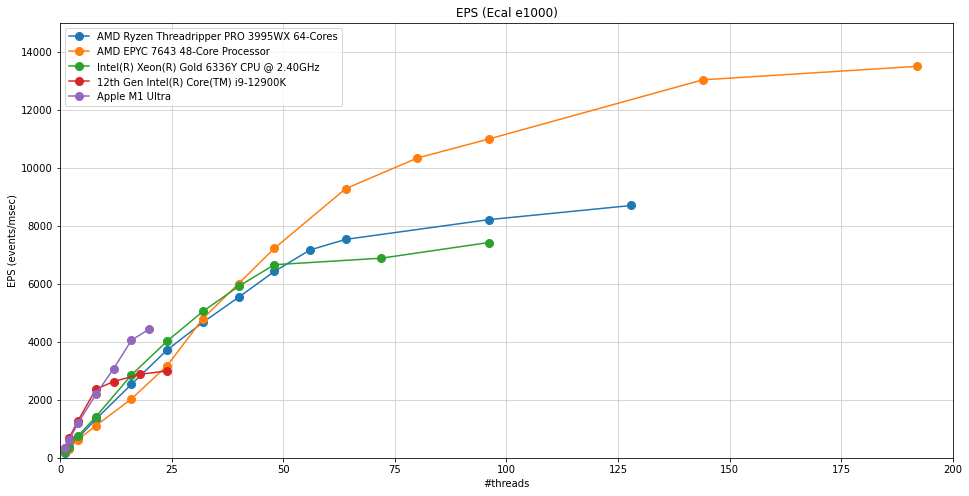

In [87]:
plot_mt(df_ecal, title="EPS (Ecal e1000)", ymax=15000)

## HCAL proton 10GeV hadron shower simulation

In [79]:
df_hcal = make_df("data/11.0.3/", "hcal_p10")
df_hcal[1]

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,hcal_p10,2022-10-12 02:48:55,AMD EPYC 7643 48-Core Processor,1103,1,4000,123.158,0.003134,30.789400,0.032480,495.718,836.371
4,hcal_p10,2022-10-12 02:51:04,AMD EPYC 7643 48-Core Processor,1103,2,8000,126.391,0.003143,15.798900,0.063297,972.313,841.864
7,hcal_p10,2022-10-12 02:53:26,AMD EPYC 7643 48-Core Processor,1103,4,16000,140.314,0.006153,8.769610,0.114035,1750.640,840.940
11,hcal_p10,2022-10-12 02:55:54,AMD EPYC 7643 48-Core Processor,1103,8,32000,145.361,0.006340,4.542520,0.220152,3379.290,840.940
2,hcal_p10,2022-10-12 02:58:24,AMD EPYC 7643 48-Core Processor,1103,16,64000,148.044,0.009769,2.313180,0.432333,6620.720,839.772
5,hcal_p10,2022-10-12 03:01:01,AMD EPYC 7643 48-Core Processor,1103,24,96000,155.080,0.014421,1.615420,0.619092,9482.770,840.471
6,hcal_p10,2022-10-12 03:03:40,AMD EPYC 7643 48-Core Processor,1103,32,128000,156.516,0.015999,1.222780,0.817890,12536.300,841.170
8,hcal_p10,2022-10-12 03:06:14,AMD EPYC 7643 48-Core Processor,1103,40,160000,151.249,0.016482,0.945305,1.057970,16218.600,841.143
9,hcal_p10,2022-10-12 03:08:53,AMD EPYC 7643 48-Core Processor,1103,48,192000,156.769,0.024288,0.816507,1.224920,18779.700,841.236
10,hcal_p10,2022-10-12 03:11:30,AMD EPYC 7643 48-Core Processor,1103,64,256000,154.454,0.043056,0.603338,1.657910,25414.000,841.115


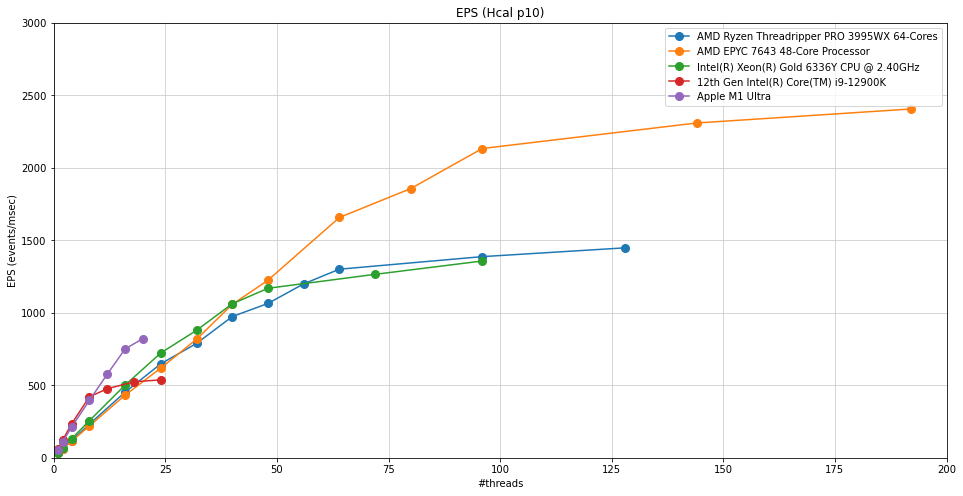

In [88]:
plot_mt(df_hcal, title="EPS (Hcal p10)", ymax=3000)

## VGEO X-ray 18MV water phantom simulation

In [89]:
df_vgeo = make_df("data/11.0.3/", "vgeo_x18")
df_vgeo[1]

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,vgeo_x18,2022-10-12 03:28:46,AMD EPYC 7643 48-Core Processor,1103,1,500000,100.916,0.003029,0.201833,4.95475,1021.19,1.89852
4,vgeo_x18,2022-10-12 03:30:57,AMD EPYC 7643 48-Core Processor,1103,2,1000000,129.352,0.002826,0.129352,7.73101,1594.03,1.89858
7,vgeo_x18,2022-10-12 03:33:15,AMD EPYC 7643 48-Core Processor,1103,4,2000000,137.711,0.002619,0.068855,14.52350,2995.51,1.89984
11,vgeo_x18,2022-10-12 03:36:22,AMD EPYC 7643 48-Core Processor,1103,8,4000000,185.977,0.005107,0.046494,21.50860,4437.32,1.90127
2,vgeo_x18,2022-10-12 03:39:15,AMD EPYC 7643 48-Core Processor,1103,16,8000000,171.317,0.006345,0.021415,46.69880,9634.02,1.90047
5,vgeo_x18,2022-10-12 03:41:53,AMD EPYC 7643 48-Core Processor,1103,24,12000000,157.494,0.010518,0.013124,76.19840,15719.60,1.90031
6,vgeo_x18,2022-10-12 03:44:10,AMD EPYC 7643 48-Core Processor,1103,32,16000000,135.720,0.015270,0.008482,117.90300,24323.50,1.90055
8,vgeo_x18,2022-10-12 03:46:27,AMD EPYC 7643 48-Core Processor,1103,40,20000000,135.712,0.017578,0.006786,147.39000,30405.80,1.90044
9,vgeo_x18,2022-10-12 03:48:40,AMD EPYC 7643 48-Core Processor,1103,48,24000000,131.357,0.018410,0.005473,182.73300,37694.70,1.90016
10,vgeo_x18,2022-10-12 03:50:57,AMD EPYC 7643 48-Core Processor,1103,64,32000000,135.678,0.025374,0.004240,235.89700,48663.00,1.90041


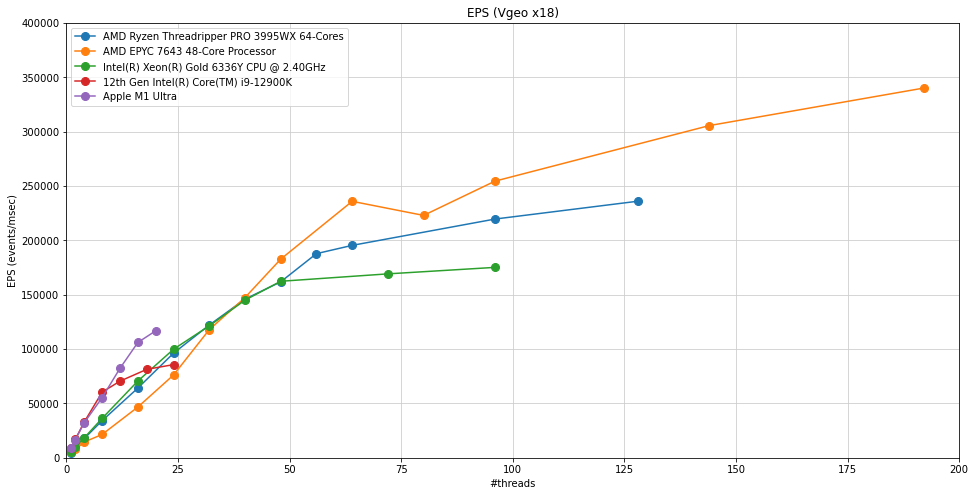

In [90]:
plot_mt(df_vgeo, title="EPS (Vgeo x18)", ymax=400000)